# Raster Analysis
Rasterio is a Python package that allows users to read, write, and analyze geospatial raster data. It's built on top of GDAL, the Geospatial Data Abstraction Library. 




---

#### 1. Reading raster file with Rasterio

Rasterio is a Python library built on GDAL and Numpy that facilitates the processing and analysis of raster data. It allows for the reading and writing of various raster formats using Python, with common formats including TIFF and GeoTIFF, Grid, and Erdas Imagine .img files.



1. First, we import the necessary Python libraries. rasterio is used for reading and writing raster data (like satellite imagery), and matplotlib is for plotting the images. numpy is used for numerical operations on the data arrays.



In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np


2. Opening the Dataset
Here, we load a Landsat 8 dataset. You'll need to replace 'path_to_landsat_image' with the path to your specific Landsat image file. If your tif file holds all the bands, then you will need to open one tif layer and read the bands. If your image comes as a series of bands, then you will need to read each band separately. 

In [6]:
# file path
fp_b1 = r'..\Data\LC09_L2SP_013032_20240702_20240703_02_T1\LC09_L2SP_013032_20240702_20240703_02_T1_SR_B1.TIF'
fp_b2 = r'..\Data\LC09_L2SP_013032_20240702_20240703_02_T1\LC09_L2SP_013032_20240702_20240703_02_T1_SR_B2.TIF'
fp_b3 = r'..\Data\LC09_L2SP_013032_20240702_20240703_02_T1\LC09_L2SP_013032_20240702_20240703_02_T1_SR_B3.TIF'
fp_b4 = r'..\Data\LC09_L2SP_013032_20240702_20240703_02_T1\LC09_L2SP_013032_20240702_20240703_02_T1_SR_B4.TIF'
fp_b5 = r'..\Data\LC09_L2SP_013032_20240702_20240703_02_T1\LC09_L2SP_013032_20240702_20240703_02_T1_SR_B5.TIF'
fp_b6 = r'..\Data\LC09_L2SP_013032_20240702_20240703_02_T1\LC09_L2SP_013032_20240702_20240703_02_T1_SR_B6.TIF'
fp_b7 = r'..\Data\LC09_L2SP_013032_20240702_20240703_02_T1\LC09_L2SP_013032_20240702_20240703_02_T1_SR_B7.TIF'
fp_b1 = r'..\Data\LC09_L2SP_013032_20240702_20240703_02_T1\LC09_L2SP_013032_20240702_20240703_02_T1_SR_B1.TIF'
fp_b10_st = r'..\Data\LC09_L2SP_013032_20240702_20240703_02_T1\LC09_L2SP_013032_20240702_20240703_02_T1_ST_B10.TIF'



3. You can use the with block to read the image. You can name it src or anything. Then call src and get its properties and methods. kwds is a varaible that we used to have the meta data of the raster. You can see the data format (driver), data type, columns (width), rows (height), count (number of bands in the file), the coordinate system of the raster and the top left corner coordinate and the cell size.  

In [7]:
with rasterio.open(fp_b4) as src:
    red_band = src.read(1).astype(np.float32)
    profile = src.profile  # Get metadata
    kwds = src.meta.copy()
kwds

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 7661,
 'height': 7781,
 'count': 1,
 'crs': CRS.from_epsg(32618),
 'transform': Affine(30.0, 0.0, 525285.0,
        0.0, -30.0, 4582215.0)}

4. Here we read each band and store it as a 2D array in a variable. 

In [8]:
with rasterio.open(fp_b2) as src:
    ar_blue = src.read(1).astype(np.float32)

with rasterio.open(fp_b3) as src:
    ar_green = src.read(1).astype(np.float32)

with rasterio.open(fp_b4) as src:
    ar_red = src.read(1).astype(np.float32)

with rasterio.open(fp_b5) as src:
    ar_nir = src.read(1).astype(np.float32)

with rasterio.open(fp_b6) as src:
    ar_swir1 = src.read(1).astype(np.float32)


    

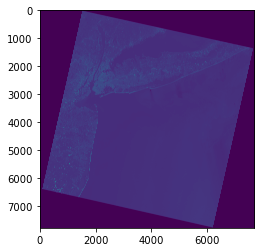

In [5]:
plt.imshow(red_band)

5. You can convert the DN values to surface reflectance if you use the right parameters from the user guide. 
Alternatively, you can normalize the bands. Normalizing the bands in satellite imagery processing, particularly when preparing images for visualization, is an important step for several reasons:

a. Enhancing Contrast and Detail
By normalizing the bands, you scale the pixel values of each band to a common range, typically 0 to 1. This helps to enhance the contrast and details within the image, making it easier for human eyes to discern different features. For instance, features like water bodies, vegetation, and urban areas become more distinguishable.

b. Equalizing Band Intensities
Different bands capture light at different wavelengths and may have varying intensity ranges due to differences in sensor sensitivity and environmental factors at the time of capture. Normalizing these bands to a common scale ensures that no single band dominates the image due to its intensity range. This is crucial when bands are combined to form composite images like RGB or false color images.

c. Improving Visualization
Without normalization, the dynamic range of an image (the difference between the darkest and lightest areas) might be too great or skewed towards one end of the spectrum, leading to an image that is either too dark or too bright. Normalizing the bands mitigates this issue, providing a more balanced visualization where features across the entire area of interest are visible.

d. Facilitating Analysis
For analytical purposes, such as calculating indices (e.g., NDVI for vegetation analysis), normalized data ensures that the calculations are based on comparable scales. This standardization is crucial for accurate quantitative analysis, allowing for meaningful comparisons across different areas or times.

e. Avoiding Saturation and Artifacts
When dealing with raw satellite data, some pixels might be saturated if the captured reflectance is very high. Normalization helps to avoid issues where these saturated pixels dominate the image, leading to visualization and analysis artifacts.



In [6]:
# Normalize bands
def normalize(array):
    array = array.astype(float)
    array -= array.min()
    array /= array.max()
    return array

6. Create a True Color composite. You can use numpy's dstack function to stack the 2D arrays and create a 3D array. In this situation the first layer will be the red band, the second will be the green and the third band will be the blue band. 

In [7]:

rgb = np.dstack((normalize(ar_red), normalize(ar_green), normalize(ar_blue)))



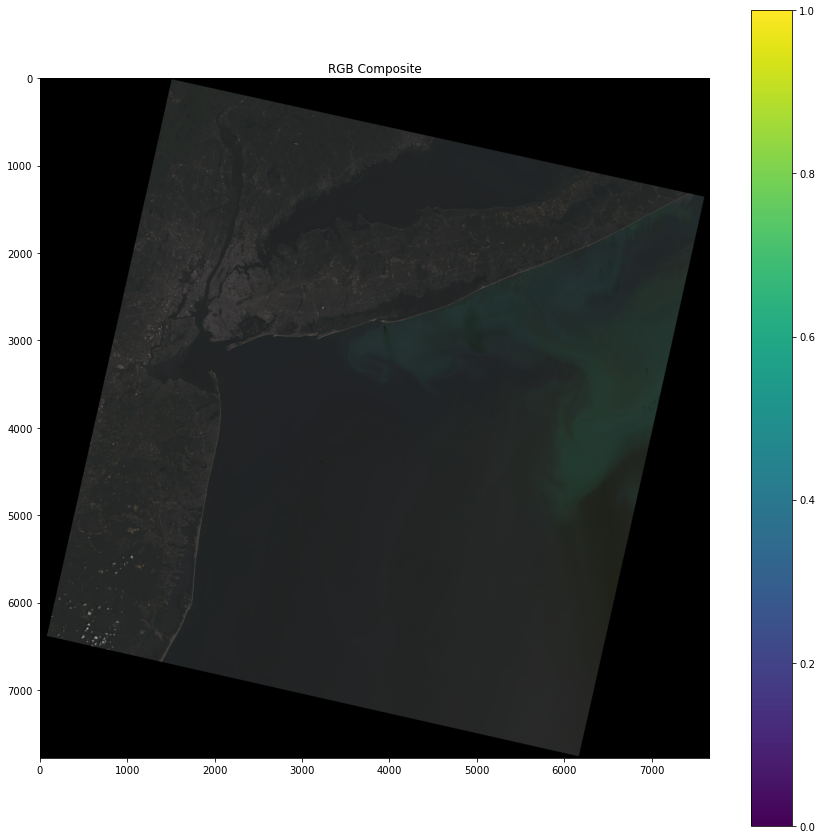

In [8]:
# Set figure size and change the color ramp
plt.figure(figsize=(15, 15))  # Set the size as needed
plt.imshow(rgb, cmap='viridis')  # Change to a different NDVI-appropriate colormap
plt.title('RGB Composite')
plt.colorbar()


Try other bands for visualization. 

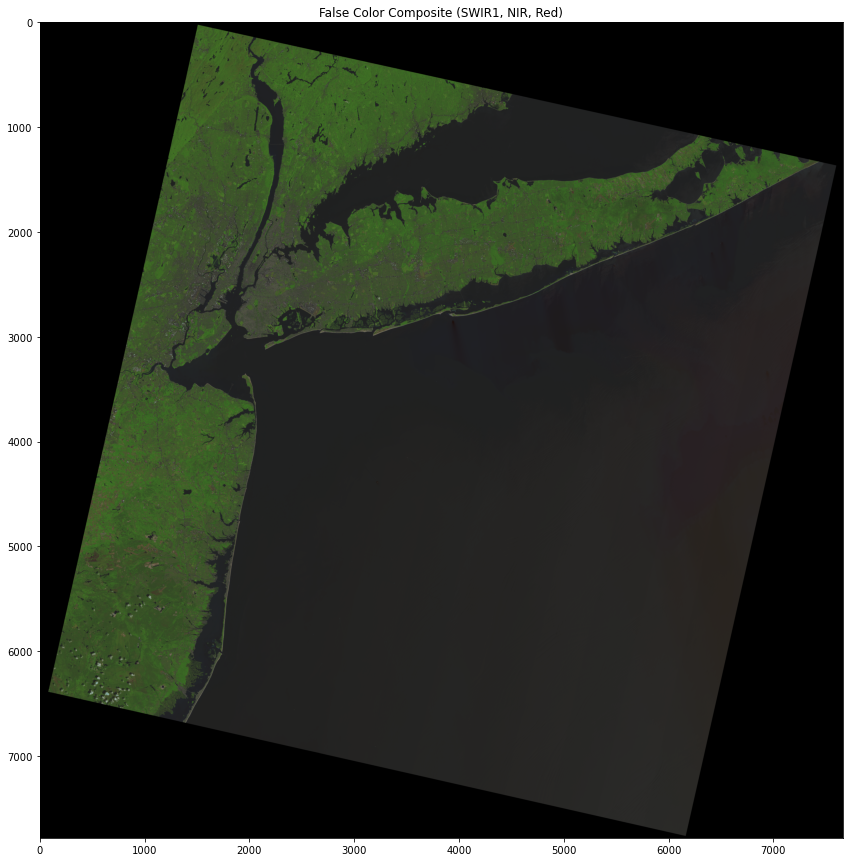

In [9]:

plt.figure(figsize=(15, 15))  # Set the size as needed
false_color = np.dstack((normalize(ar_swir1), normalize(ar_nir), normalize(ar_red)))

plt.imshow(false_color)
plt.title('False Color Composite (SWIR1, NIR, Red)')
plt.show()